In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress

from datetime import datetime
from dateutil.parser import parse

import math
import os
import copy
import pickle

import drugLookup
import networkx as nx
from matplotlib.lines import Line2D

## Import data

In [28]:
# Load the file
file = open('drug_df', 'rb')
drug_df = pickle.load(file)

## Connected subgraph
Create subgraph with only connected components

In [29]:
# Get nodes and node sizes, edges and edge weights

# Count occurences of each drug and vendor
vendor_counts = drug_df.groupby(by = 'vendor_name', sort = True).count()['drug_prediction']

# Only keep edges which have a connection of at least the threshold
# Only keep nodes which are connected
sales_thresh = 50

# Get edges for the graph (hierarchical series with drug sales for each vendor)
drug_vendor_counts = drug_df.groupby(['drug_prediction','vendor_name']).count()['date']

# Filter to only get edges which satisfy threshold
drug_vendor_counts = drug_vendor_counts[drug_vendor_counts > sales_thresh]
edges = [connection for connection in drug_vendor_counts.index]
edge_weights = list(drug_vendor_counts)

# Get drug nodes and corresponding sizes
drug_nodes = list(pd.unique([edge[0] for edge in edges]))
drug_node_sizes = [.7*np.sum(drug_vendor_counts[drug]) for drug in drug_nodes]

# Get vendor nodes and corresponding sizes
vendor_nodes = list(pd.unique([edge[1] for edge in edges]))
vendor_drug_counts = drug_df.groupby(['vendor_name','drug_prediction']).count()['date']
vendor_drug_counts = vendor_drug_counts[vendor_drug_counts > sales_thresh]
vendor_node_size_dict = {vendor : np.sum(vendor_drug_counts[vendor]) for vendor in vendor_nodes}
vendor_node_sizes = [vendor_node_size_dict[vendor] for vendor in vendor_nodes]

# Combine node lists
all_nodes = drug_nodes + vendor_nodes
node_colors = ['red' for drug in drug_nodes] + ['dodgerblue' for vendor in vendor_nodes]
# node_colors = [np.random.rand(3,) for drug in drug_nodes] + ['dodgerblue' for vendor in vendor_nodes]
node_sizes = drug_node_sizes + vendor_node_sizes

# Print number of vendors and number of drugs
print('Number of vendors:', len(vendor_nodes))
print('Number of drugs  :', len(drug_nodes))

Number of vendors: 398
Number of drugs  : 20


In [30]:
# print(len(drug_nodes))
# print(len(node_colors[:len(drug_nodes)]))
legend_elements = []
for drug_color_size in list(zip(drug_nodes, node_colors[:len(drug_nodes)], drug_node_sizes)):
    drug = drug_color_size[0]
    color = drug_color_size[1]
    size = drug_color_size[2]
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=drug,
                          markerfacecolor=color, markersize=size/100))
    
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label='Drugs',
                          markerfacecolor='red', markersize=30),
                   Line2D([0], [0], marker='o', color='w', label='Vendors',
                          markerfacecolor='dodgerblue', markersize=15)]

## Plot results

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


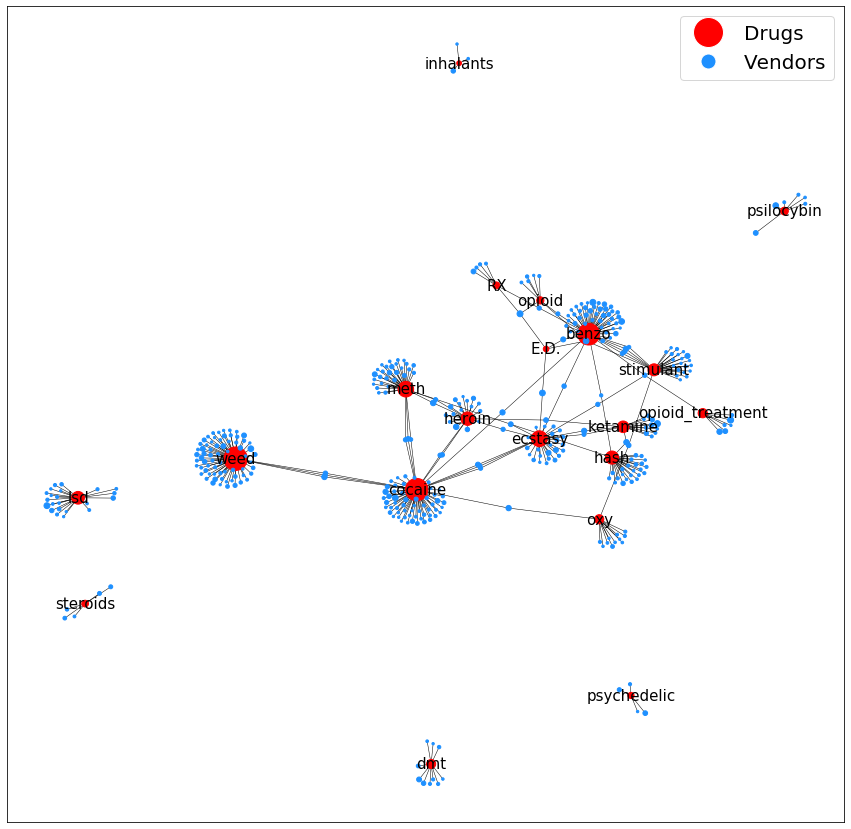

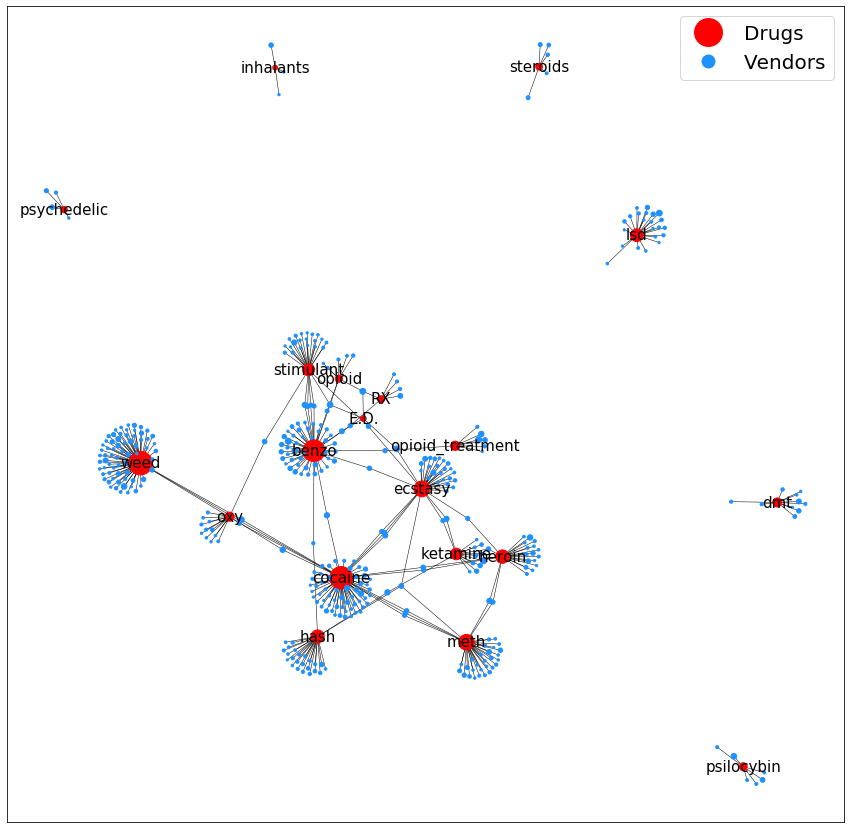

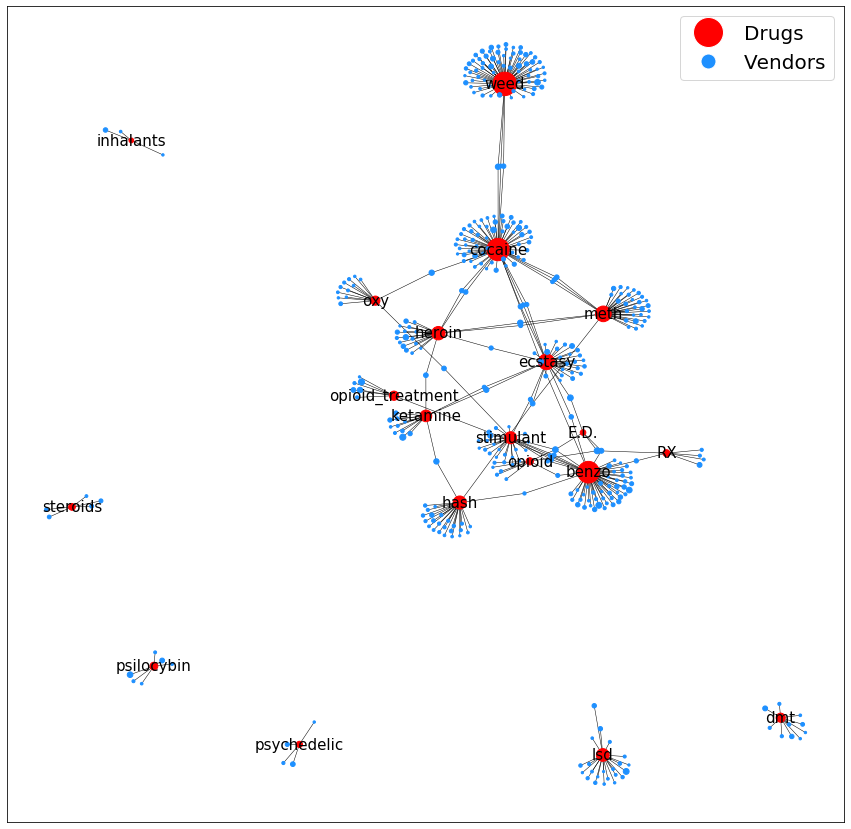

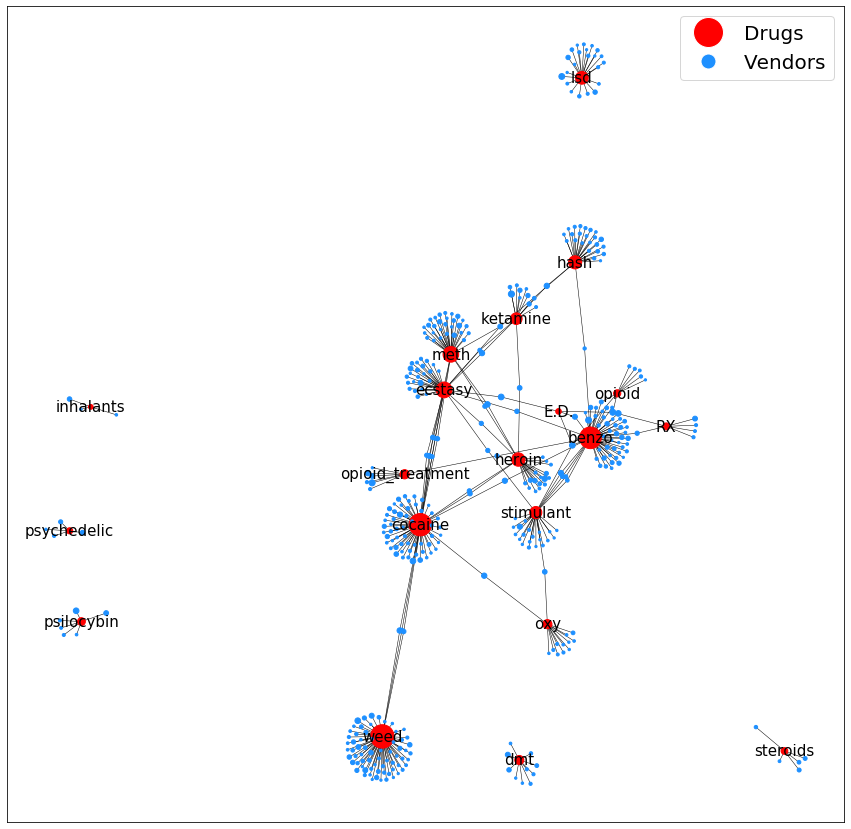

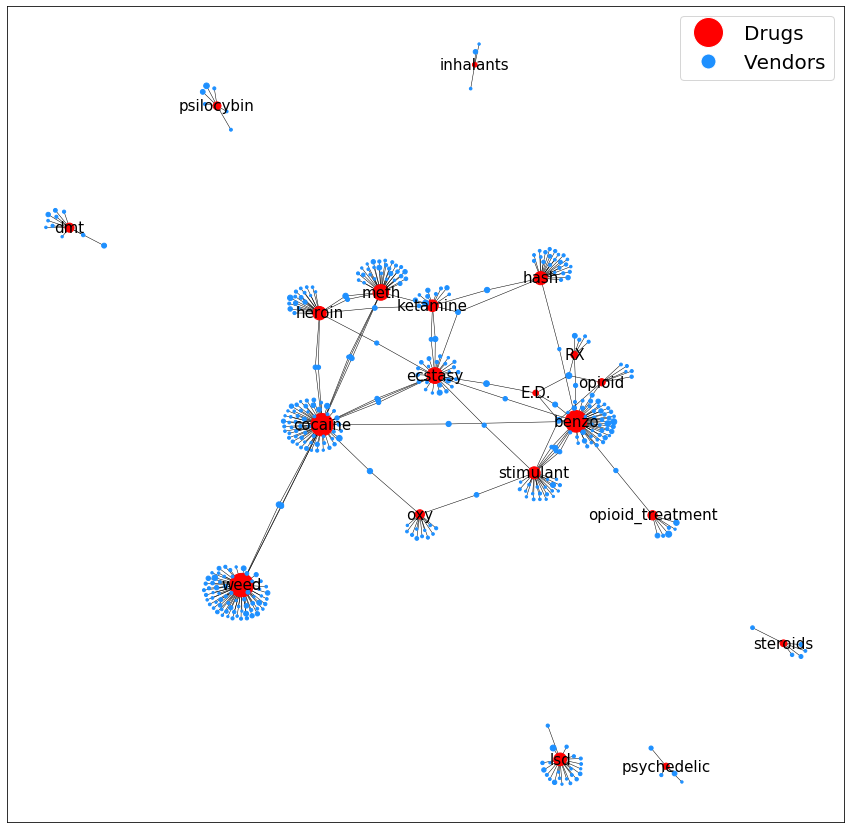

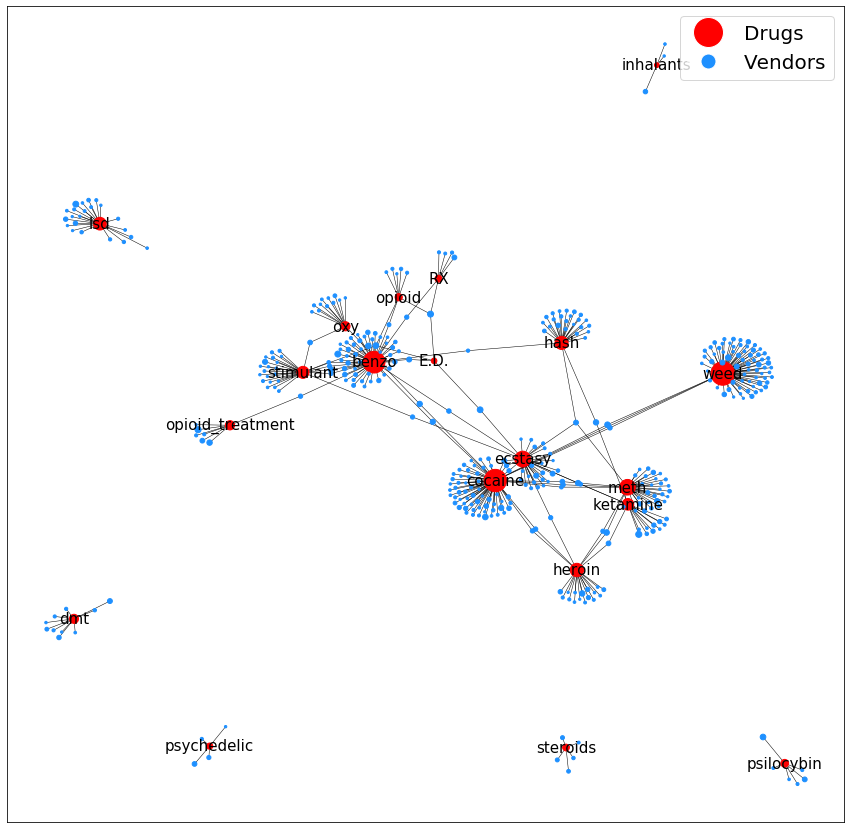

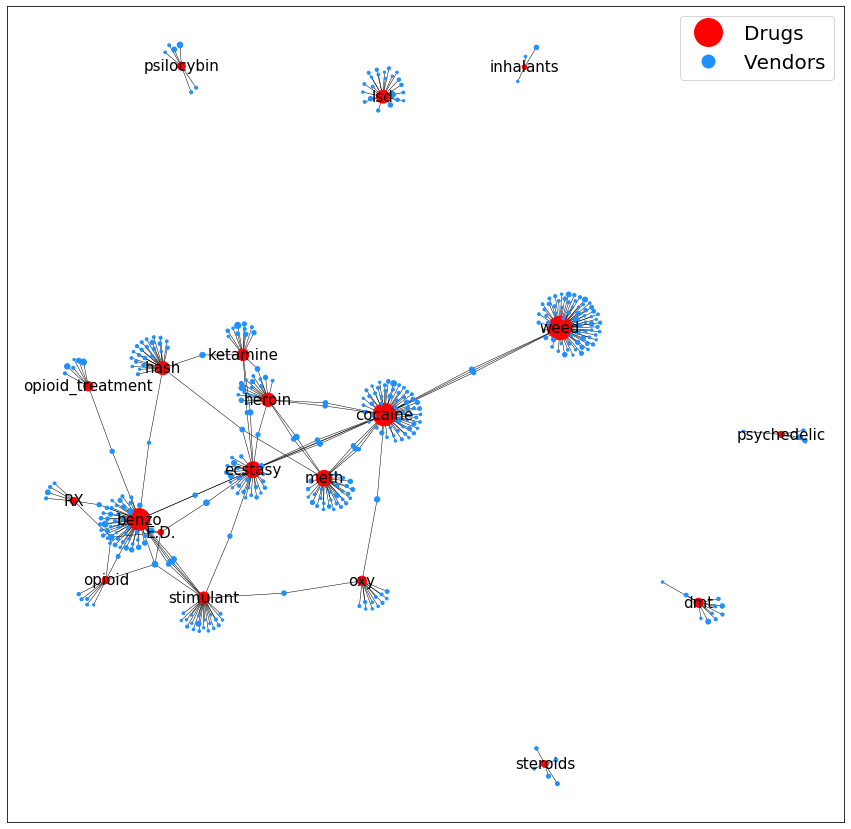

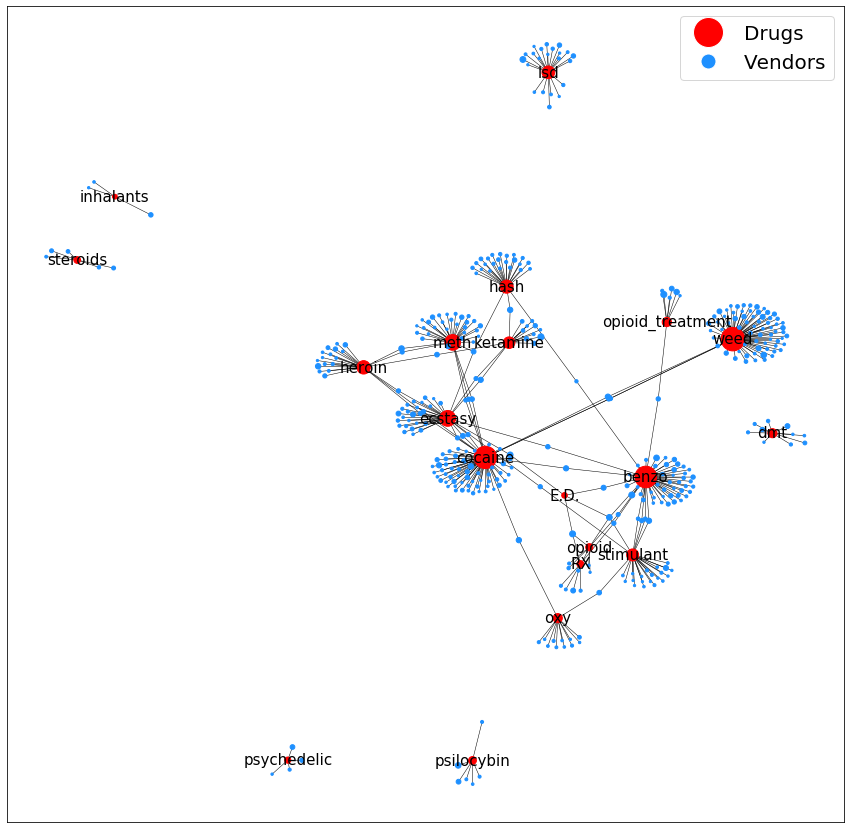

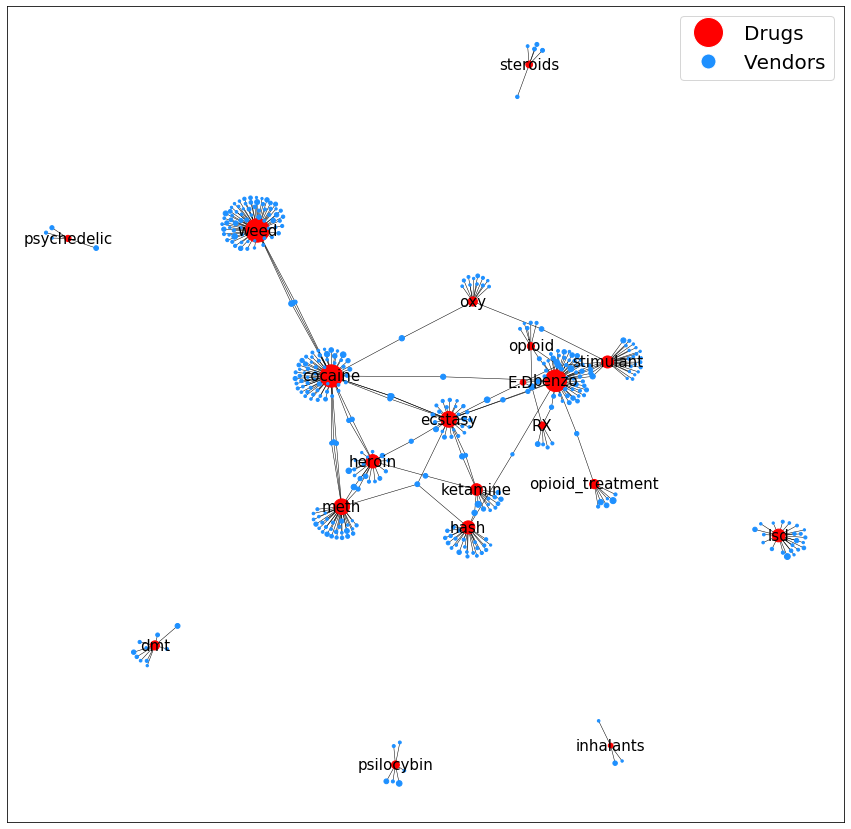

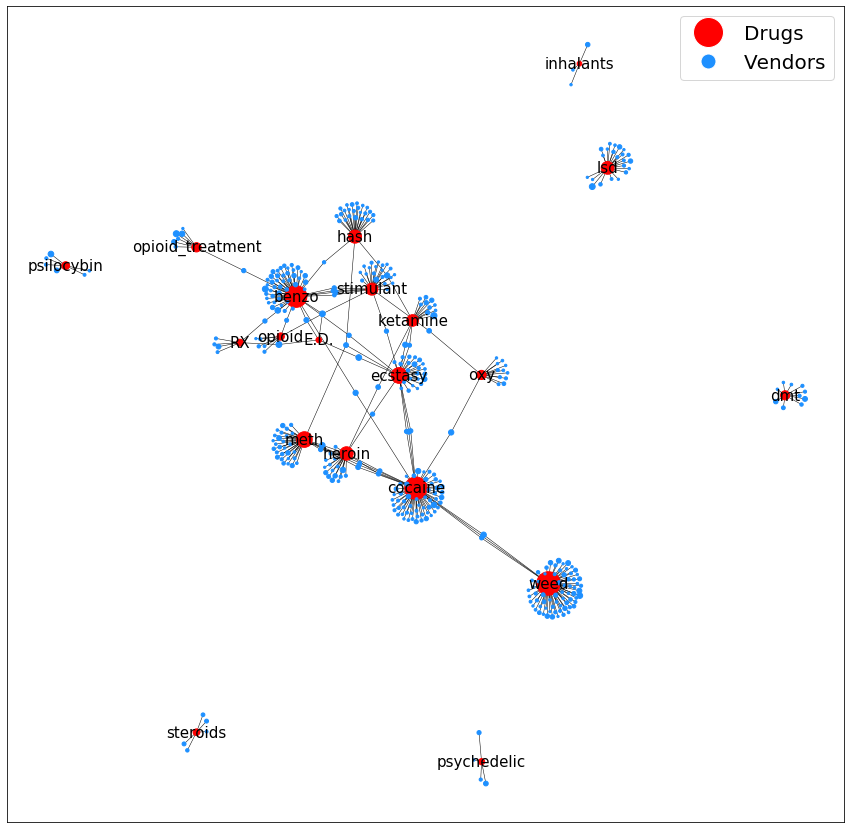

In [35]:
pos_hist = []
for i in range(10):
    scale = .1
    # Plot the resulting graph
    t = plt.figure(figsize = (15,15))

    # Create new graph for connected components
    G6 = nx.Graph()
    G6.add_nodes_from(all_nodes)
    G6.add_edges_from(edges)

    # Get positions of drug nodes
    all_pos = nx.spring_layout(G6)
#     drug_pos = {key : key for key in all_pos if key in drug_nodes}
    drug_pos = {'benzodiazepines': 'benzo',
                 'cocaine': 'cocaine',
                 'dmt': 'dmt',
                 'ecstasy': 'ecstasy',
                 'erectile_dysfunction': 'E.D.',
                 'hashish': 'hash',
                 'heroin': 'heroin',
                 'inhalants': 'inhalants',
                 'ketamine': 'ketamine',
                 'lsd': 'lsd',
                 'marijuana': 'weed',
                 'methamphetamine': 'meth',
                 'opioid': 'opioid',
                 'opioid_treatment': 'opioid_treatment',
                 'oxycodone': 'oxy',
                 'prescription': 'RX',
                 'psilocybin': 'psilocybin',
                 'psychedelic': 'psychedelic',
                 'steroids_and_hormones': 'steroids',
                 'stimulant': 'stimulant'}
    pos_hist.append((all_pos, drug_pos))

    # fig, ax = plt.subplot()

    nx.draw_networkx(G6, 
                     pos = all_pos,
                     with_labels = False,
                     node_color = node_colors,
                     node_size = [scale * node_size for node_size in node_sizes],
                     width = [.5 for edge in edges]
    #                  width = np.sqrt(edge_weights)
                    )

    # Label the drugs
    nx.draw_networkx_labels(G6, all_pos, drug_pos, font_size = 15, font_color = 'black')

    # Show results
    plt.legend(handles = legend_elements2, loc = 'best', fontsize = 20)
    plt.show()

    t.savefig('graph'+str(i)+'.png', dpi = 200)

{'benzodiazepines': 'benzodiazepines',
 'cocaine': 'cocaine',
 'dmt': 'dmt',
 'ecstasy': 'ecstasy',
 'erectile_dysfunction': 'erectile_dysfunction',
 'hashish': 'hashish',
 'heroin': 'heroin',
 'inhalants': 'inhalants',
 'ketamine': 'ketamine',
 'lsd': 'lsd',
 'marijuana': 'marijuana',
 'methamphetamine': 'methamphetamine',
 'opioid': 'opioid',
 'opioid_treatment': 'opioid_treatment',
 'oxycodone': 'oxycodone',
 'prescription': 'prescription',
 'psilocybin': 'psilocybin',
 'psychedelic': 'psychedelic',
 'steroids_and_hormones': 'steroids_and_hormones',
 'stimulant': 'stimulant'}

In [36]:
pos_hist[4]

({'benzodiazepines': array([0.35684957, 0.03967868]),
  'cocaine': array([-0.20863219,  0.0311959 ]),
  'dmt': array([-0.77085414,  0.53261316]),
  'ecstasy': array([0.04265363, 0.15617739]),
  'erectile_dysfunction': array([0.26704937, 0.11191128]),
  'hashish': array([0.27811499, 0.40409601]),
  'heroin': array([-0.21424974,  0.31501439]),
  'inhalants': array([0.13149623, 0.94737325]),
  'ketamine': array([0.03727571, 0.33393937]),
  'lsd': array([ 0.32150483, -0.82070137]),
  'marijuana': array([-0.38766185, -0.37712604]),
  'methamphetamine': array([-0.07765651,  0.36782155]),
  'opioid': array([0.41402462, 0.13918591]),
  'opioid_treatment': array([ 0.52726484, -0.19945526]),
  'oxycodone': array([ 0.00923406, -0.19703304]),
  'prescription': array([0.35313334, 0.20881092]),
  'psilocybin': array([-0.44233787,  0.8427562 ]),
  'psychedelic': array([ 0.5575025 , -0.83811959]),
  'steroids_and_hormones': array([ 0.8189402 , -0.52513854]),
  'stimulant': array([ 0.26379679, -0.09137

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


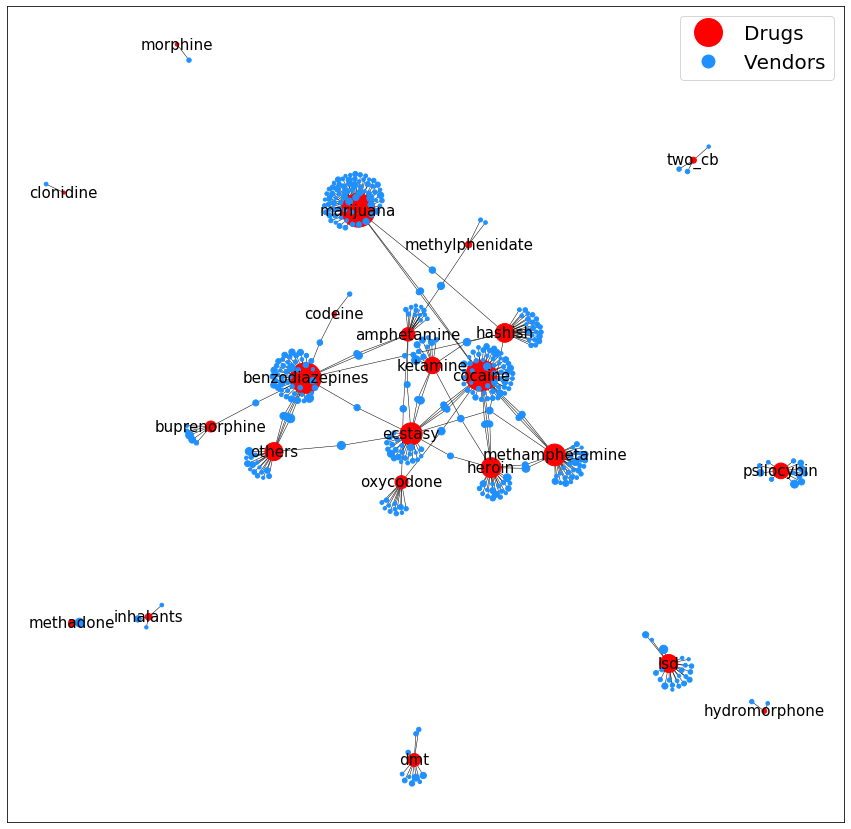

In [16]:
scale = .2
# Plot the resulting graph
t = plt.figure(figsize = (15,15))

nx.draw_networkx(G6, 
                 pos = all_pos,
                 with_labels = False,
                 node_color = node_colors,
                 node_size = [scale * node_size for node_size in node_sizes],
                 width = [.5 for edge in edges]
#                  width = np.sqrt(edge_weights)
                )

# Label the drugs
nx.draw_networkx_labels(G6, all_pos, drug_pos, font_size = 15, font_color = 'black')
plt.legend(handles = legend_elements2, loc = 'best', fontsize = 20)
plt.show()
t.savefig('graph'+i+'.png'.png', dpi = 150)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


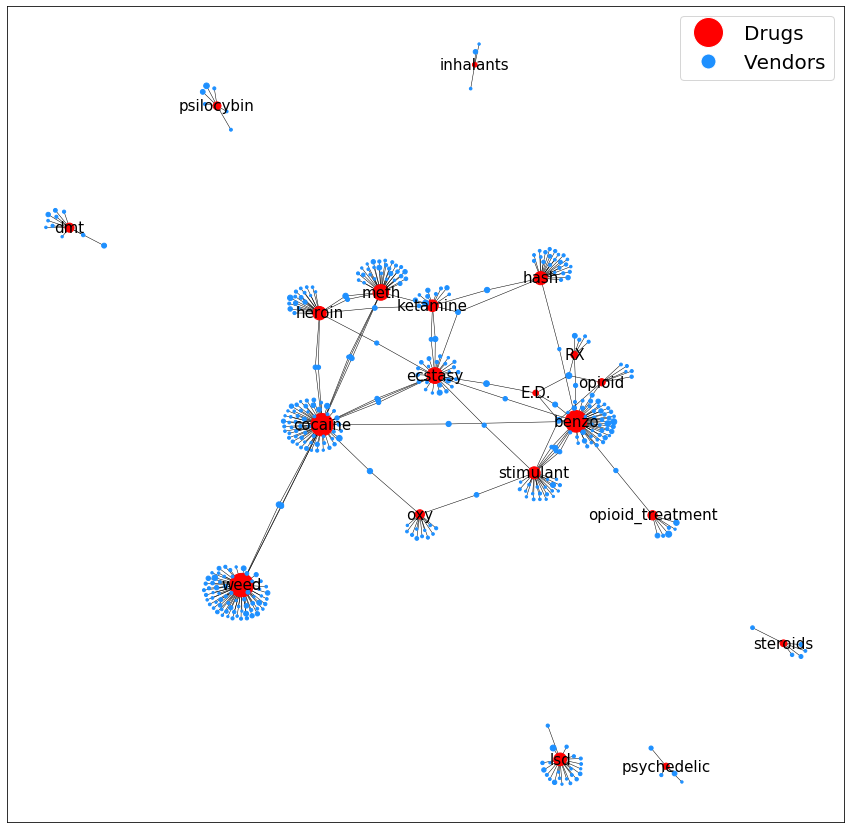

In [44]:
scale = .1
# Plot the resulting graph
t = plt.figure(figsize = (15,15))

# Create new graph for connected components
G6 = nx.Graph()
G6.add_nodes_from(all_nodes)
G6.add_edges_from(edges)

# Get positions of drug nodes
all_pos = nx.spring_layout(G6)
#     drug_pos = {key : key for key in all_pos if key in drug_nodes}
drug_pos = {'benzodiazepines': 'benzo',
             'cocaine': 'cocaine',
             'dmt': 'dmt',
             'ecstasy': 'ecstasy',
             'erectile_dysfunction': 'E.D.',
             'hashish': 'hash',
             'heroin': 'heroin',
             'inhalants': 'inhalants',
             'ketamine': 'ketamine',
             'lsd': 'lsd',
             'marijuana': 'weed',
             'methamphetamine': 'meth',
             'opioid': 'opioid',
             'opioid_treatment': 'opioid_treatment',
             'oxycodone': 'oxy',
             'prescription': 'RX',
             'psilocybin': 'psilocybin',
             'psychedelic': 'psychedelic',
             'steroids_and_hormones': 'steroids',
             'stimulant': 'stimulant'}
pos_hist.append((all_pos, drug_pos))

# fig, ax = plt.subplot()

nx.draw_networkx(G6, 
                 pos = pos_hist[4][0],
                 with_labels = False,
                 node_color = node_colors,
                 node_size = [scale * node_size for node_size in node_sizes],
                 width = [.5 for edge in edges]
#                  width = np.sqrt(edge_weights)
                )

# Label the drugs
nx.draw_networkx_labels(G6, pos_hist[4][0], pos_hist[4][1], font_size = 15, font_color = 'black')

# Show results
plt.legend(handles = legend_elements2, loc = 'best', fontsize = 20)
plt.show()

t.savefig('graph_best.png', dpi = 500)

In [39]:
pos_hist[4]

({'benzodiazepines': array([-0.10361018,  0.08051573]),
  'cocaine': array([-0.04270238, -0.20156663]),
  'dmt': array([ 0.93692627, -0.03429796]),
  'ecstasy': array([ 0.13853895, -0.00432058]),
  'erectile_dysfunction': array([0.00705206, 0.15207925]),
  'hashish': array([-0.09563897, -0.33197974]),
  'heroin': array([ 0.3194761 , -0.15467694]),
  'inhalants': array([-0.19098395,  0.93095552]),
  'ketamine': array([ 0.21587132, -0.14879366]),
  'lsd': array([0.6215093 , 0.55907893]),
  'marijuana': array([-0.49327171,  0.05293622]),
  'methamphetamine': array([ 0.23884701, -0.34467405]),
  'opioid': array([-0.04792939,  0.24048004]),
  'opioid_treatment': array([0.21349501, 0.0914788 ]),
  'oxycodone': array([-0.2934306 , -0.06590044]),
  'prescription': array([0.04706181, 0.19498915]),
  'psilocybin': array([ 0.86060375, -0.62108468]),
  'psychedelic': array([-0.66494475,  0.61581934]),
  'steroids_and_hormones': array([0.40188419, 0.9331611 ]),
  'stimulant': array([-0.11586577,  0